In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

## Create some toy data

In [2]:
# import some data to play with
iris = datasets.load_iris()
x_train = iris.data[:, :2].astype(np.float32)  # we only take the first two features.
y_train = iris.target.astype(np.int64)

## Create a Linear Model

In [3]:
model = torch.nn.Linear(2,3)

## Define Loss Functions and Optimizer

In [4]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

## Train the Model

In [5]:
for epoch in range(10000):
    y_pred_prob = model(torch.from_numpy(x_train))
    optimizer.zero_grad()
    loss = loss_fn(y_pred_prob, torch.from_numpy(y_train))
    loss.backward()
    optimizer.step()
    if epoch%1000==0:
        print(f'loss:{loss}')

loss:3.301572561264038
loss:0.5330173969268799
loss:0.4871974587440491
loss:0.46576058864593506
loss:0.45234471559524536
loss:0.44295719265937805
loss:0.4359937906265259
loss:0.430635005235672
loss:0.42640140652656555
loss:0.42298823595046997


## Plot the decision boundary

### Create a mesh grid

In [6]:
x1_min, x2_min = x_train.min(0)-0.5
x1_max, x2_max = x_train.max(0)+0.5

In [7]:
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

### Predict the labels on training data

In [9]:
y_pred_score = model(torch.from_numpy(np.c_[x1.ravel(), x2.ravel()].astype(np.float32)))

In [10]:
 _, y_pred = torch.max(y_pred_score.data, 1)

In [11]:
y_pred = y_pred.data.numpy().reshape(x1.shape)

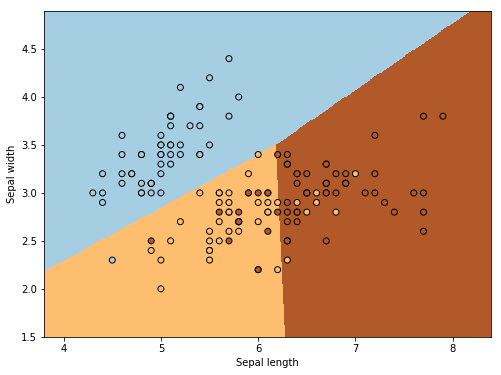

In [12]:
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(x1, x2, y_pred, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
#plt.xticks(())
#plt.yticks(())

plt.show()